In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import cv2

In [2]:
from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization
import os
import seaborn as sns

In [3]:
print(os.listdir("cats_dogs_dataset"))

['train', 'val']


In [4]:
SIZE = 128

In [5]:
train_images = []
train_labels = []
for directory_path in glob.glob("cats_dogs_dataset/train/*"):
      label = directory_path.split("\\")[-1]
      # print(label) 
      for img_path in glob.glob (os.path.join(directory_path, "*.jpg")):
            # print(img_path)
            img = cv2.imread(img_path, cv2.IMREAD_COLOR) 
            img = cv2.resize(img, (SIZE, SIZE))
            img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
            train_images.append(img)
            train_labels.append(label)
            
train_images = np.array(train_images)
train_labels = np.array(train_labels)

In [6]:
test_images = []
test_labels = []
for directory_path in glob.glob("cats_dogs_dataset/val/*"):
      fruit_label = directory_path.split("\\")[-1]
      for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
            img = cv2.imread(img_path, cv2. IMREAD_COLOR)
            img = cv2.resize(img, (SIZE, SIZE))
            img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
            test_images.append(img)
            test_labels.append(fruit_label)
test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [7]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder() 
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels) 
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)

In [8]:
x_train, y_train, x_test, y_test = train_images, train_labels_encoded, test_images, test_labels_encoded

In [9]:
x_train, x_test = x_train/255.0, x_test/255.0

In [10]:
from keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

activation = 'sigmoid'
feature_extractor = Sequential()
feature_extractor.add(Conv2D (32, 3, activation = activation, padding = 'same', input_shape = (128,128, 3)))
feature_extractor.add(BatchNormalization())

feature_extractor.add(Conv2D (32, 3, activation = activation, padding = 'same', kernel_initializer='he_uniform'))
feature_extractor.add(BatchNormalization())
feature_extractor.add(MaxPooling2D())

feature_extractor.add(Conv2D(64, 3, activation = activation, padding = 'same', kernel_initializer='he_uniform'))
feature_extractor.add(BatchNormalization())

feature_extractor.add(Conv2D (64, 3, activation = activation, padding = 'same', kernel_initializer='he_uniform'))
feature_extractor.add(BatchNormalization())
feature_extractor.add(MaxPooling2D())

feature_extractor.add(Flatten())

In [15]:
x = feature_extractor.output
x = Dense(128, activation=activation, kernel_initializer='he_uniform')(x)
prediction_layer = Dense(2, activation='softmax')(x)

In [16]:
model = Model(inputs=feature_extractor.input, outputs=prediction_layer)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 128, 128, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 128, 128, 32)      128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 batch_normalization_1 (Bat  (None, 128, 128, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 32)        0   

In [18]:
history = model.fit(x_train, y_train_one_hot, epochs=30, validation_data=(x_test, y_test_one_hot))

Epoch 1/30
18/18 [==============================] - 23s 1s/step - loss: 0.6656 - accuracy: 0.6014 - val_loss: 0.6936 - val_accuracy: 0.4643
Epoch 2/30
18/18 [==============================] - 22s 1s/step - loss: 0.6613 - accuracy: 0.6086 - val_loss: 0.7384 - val_accuracy: 0.5000
Epoch 3/30
18/18 [==============================] - 23s 1s/step - loss: 0.6447 - accuracy: 0.6445 - val_loss: 0.7181 - val_accuracy: 0.5000
Epoch 4/30
18/18 [==============================] - 24s 1s/step - loss: 0.6873 - accuracy: 0.5889 - val_loss: 0.7003 - val_accuracy: 0.5000
Epoch 5/30
18/18 [==============================] - 26s 1s/step - loss: 0.6413 - accuracy: 0.6391 - val_loss: 0.6878 - val_accuracy: 0.5429
Epoch 6/30
18/18 [==============================] - 27s 2s/step - loss: 0.6080 - accuracy: 0.6535 - val_loss: 0.7394 - val_accuracy: 0.5000
Epoch 7/30
18/18 [==============================] - 27s 1s/step - loss: 0.6085 - accuracy: 0.6535 - val_loss: 0.6759 - val_accuracy: 0.6357
Epoch 8/30
18/18 [==

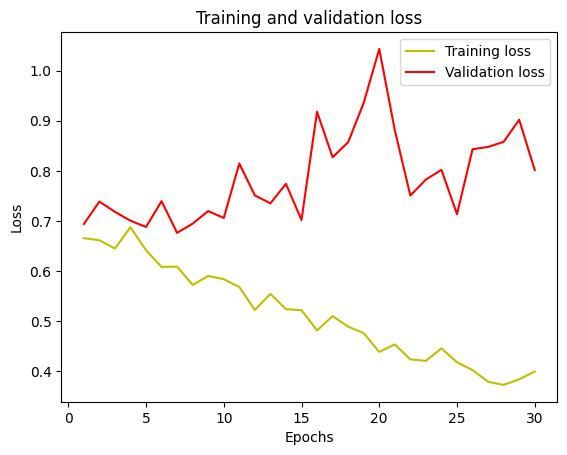

In [20]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

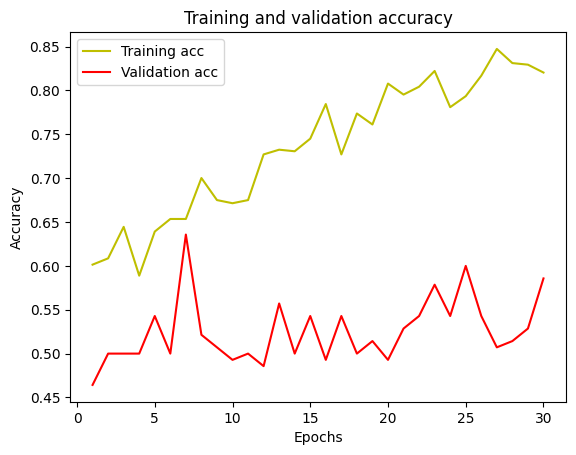

In [23]:
acc = history.history['accuracy']  # 'accuracy' instead of 'acc'
val_acc = history.history['val_accuracy']  # 'val_accuracy' instead of 'val_acc'

plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [24]:
prediction_NN = model.predict(x_test)
prediction_NN = np.argmax(prediction_NN, axis=-1)
prediction_NN = le.inverse_transform(prediction_NN)

5/5 [==============================] - 2s 258ms/step


[[40 30]
 [28 42]]


<Axes: >

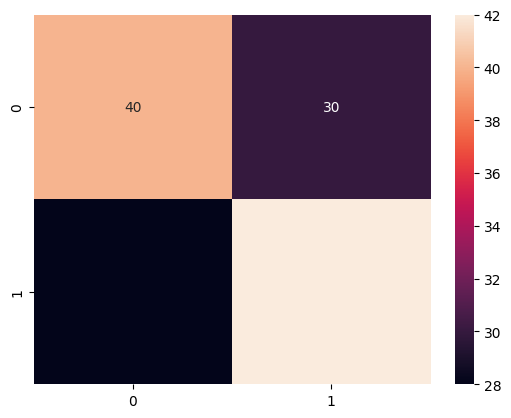

In [25]:

#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, prediction_NN)
print(cm)
sns.heatmap(cm, annot=True)

1/1 [==============================] - 0s 56ms/step
The prediction for this image is:  0
The actual label for this image is:  cats


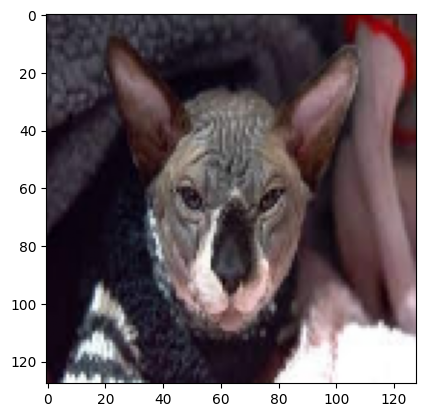

In [27]:
n=5 #Select the index of image to be loaded for testing
img = x_test[n]
plt.imshow(img)
input_img = np.expand_dims (img, axis=0) #Expand dims so the input is (num in
prediction = np.argmax(model.predict(input_img)) #argmax to convert cat prediction = le.inverse_transform([prediction]) #Reverse the Label encoder
print("The prediction for this image is: ", prediction)
print("The actual label for this image is: ", test_labels[n])

In [28]:
X_for_RF = feature_extractor.predict(x_train) 

18/18 [==============================] - 6s 304ms/step


In [29]:
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators = 50, random_state = 42)

In [30]:
#Train the model on training data
RF_model.fit(X_for_RF, y_train) #For sklearn no one hot encoding

RandomForestClassifier(n_estimators=50, random_state=42)

In [31]:
#Send test data through same feature extractor process
X_test_feature = feature_extractor.predict(x_test)

5/5 [==============================] - 2s 317ms/step


In [32]:
#Now predict using the trained RF model.
prediction_RF = RF_model.predict(X_test_feature) #Inverse Le transform to get original Label back.
prediction_RF = le.inverse_transform(prediction_RF)

In [33]:
#Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, prediction_RF))

Accuracy =  0.6571428571428571


In [34]:
cm = confusion_matrix(test_labels, prediction_RF)
print(cm)

[[47 23]
 [25 45]]


1/1 [==============================] - 0s 44ms/step
The prediction for this image is:  ['cats']
The actual label for this image is:  cats


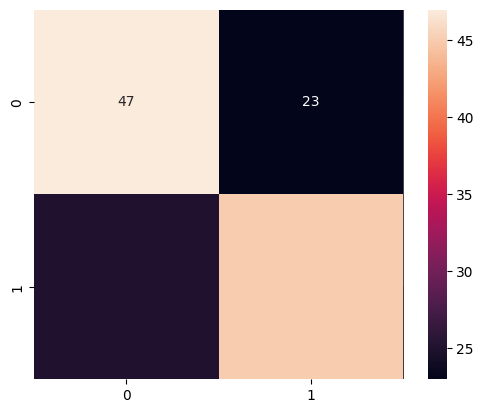

In [35]:
sns.heatmap(cm, annot=True)
n=5 #Select the index of image to be Loaded for testing
img = x_test[n]
plt.imshow(img)
input_img = np.expand_dims (img, axis=0) #Expand dims so the input is (num
input_img_features=feature_extractor.predict(input_img) 
prediction_RF = RF_model.predict(input_img_features)[0]
prediction_RF = le.inverse_transform([prediction_RF]) #Reverse the Label
print("The prediction for this image is: ", prediction_RF) 
print("The actual label for this image is: ", test_labels[n])

In [20]:
from keras.models import Model
from keras.layers import Input, Dense

input_shape = (128,128, 3)
input_layer = Input(shape=input_shape)
x = feature_extractor(input_layer)

# Add dense layers
x = Dense(128, activation=activation, kernel_initializer='he_uniform')(x)
prediction_layer = Dense(4, activation='softmax')(x)

# Create the final model
model = Model(inputs=input_layer, outputs=prediction_layer)

# Compile the model and train it as usual
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 640, 940, 3)]     0         
                                                                 
 sequential_3 (Sequential)   (None, 2406400)           66336     
                                                                 
 dense_4 (Dense)             (None, 128)               308019328 
                                                                 
 dense_5 (Dense)             (None, 4)                 516       
                                                                 
Total params: 308086180 (1.15 GB)
Trainable params: 308085796 (1.15 GB)
Non-trainable params: 384 (1.50 KB)
_________________________________________________________________
None


In [21]:
history = model.fit(x_train, y_train_one_hot, epochs=1, validation_data=(x_test, y_test_one_hot))

ValueError: in user code:

    File "c:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "model_2" is incompatible with the layer: expected shape=(None, 640, 940, 3), found shape=(None, 128, 128, 3)
